# Objective Of The Project

A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from last month.

The purchase col column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.
What factors have the greatest influence on purchase amount?

# About This Data

- `User_ID` — unique ID for each user
- `Product_ID` — unique ID for each product
- `Gender` — gender of the user(M/F)
- `Age	` — age of the user
- `Occupation` — occupation (masked)
- `City_Category` — category of the city(Type B/Type C/Other)
- `Stay_In_Current_City_Years` — number of years stayed in the current city
- `Marital_Status` — marital Status(Married/Unmarried)
- `Product_Category_1` — product category(masked)
- `Product_Category_2` — product may belongs to other category also (Masked)
- `Product_Category_3` — product may belongs to other category also (Masked)
- `Purchase` — purchase amount (Target Variable)

# Table Of Content


1. [Importing libraries. Openig dataset](#start)


2. [Data preprocessing](#preprocessing)
 
    2.1 [Rename columns](#rename_columns)
    
    2.2 [Dublicates treatment](#duplicates)
    
    2.3 [Missing value treatment](#null)
    
    2.4 [Change of type](#type)
       
    2.5 [Check and treatment for outliers](#outliers)
    
    2.6 [Converting categorical data into integer](#converting)
    
    
3. [Exploratory data analysis](#analyse)

    3.1 [Purchase Distribution](#purchase)

    3.2 [Age vs Purchased](#age_purchased)
    
    3.3 [Gender vs Purchased](#gender_purchased)
    
    3.4 [Occupation vs Purchased](#occupation_purchased)
    
    3.5 [City_category vs Purchased](#city_purchased)
    
    3.6 ['Stay in current city years'  vs Purchased](#stay_in_city_purchased)
    
    3.7 [Marital status vs Purchased](#marital_status)
    
    3.8 [Product categories vs Purchased](#product)
    
    3.9 [Other distributions](#other)
    
    
 4. [Conclusions and recommendations](#conclusions)
    

<a id='start'></a>
## Importing libraries. Openig dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

In [2]:

df = pd.read_csv('C:/Users/олег/Desktop/Наталья/Data analyse/Pet projects/Data/black friday sales/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


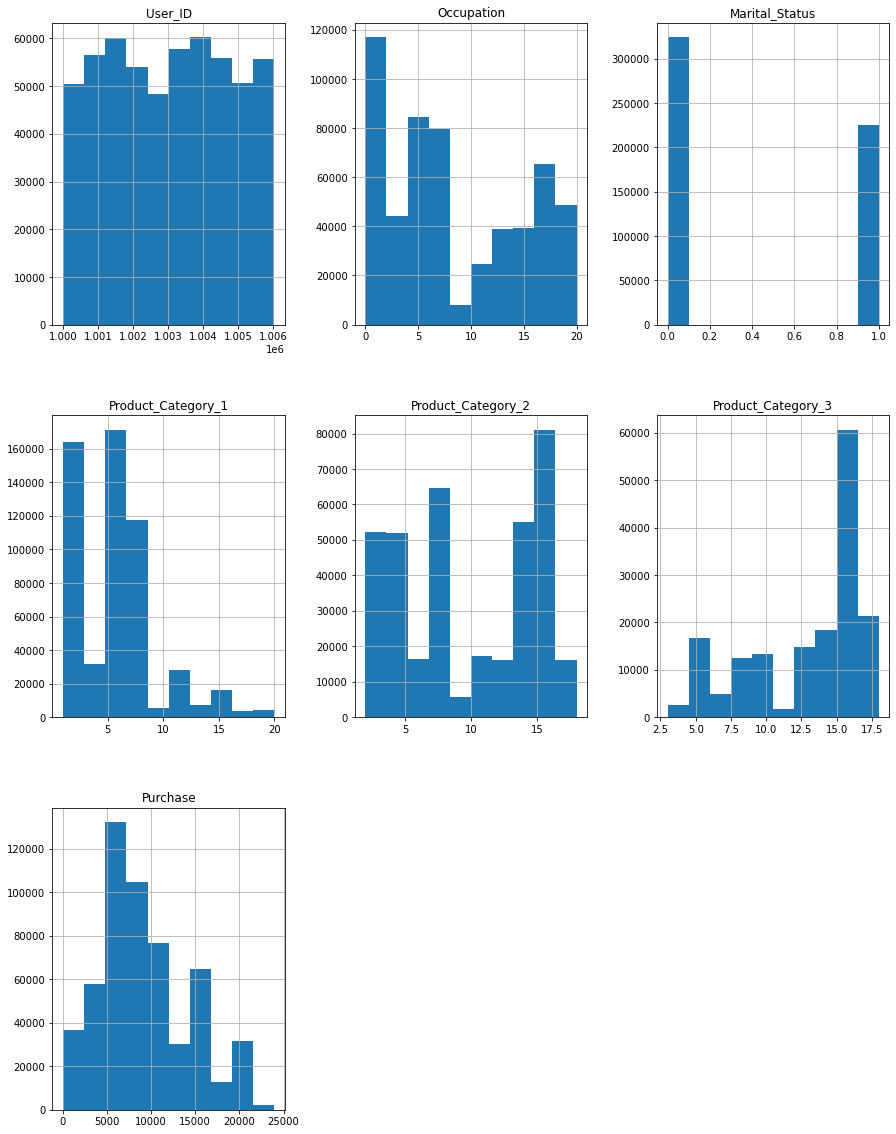

In [6]:
df.hist(figsize=(15,20));

In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

<a id='rename_columns'></a>
### Rename columns

In [8]:
#lowercase columns name
df.columns = df.columns.str.lower()
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

<a id='duplicates'></a>
### Duplicates treatment

In [9]:
df.duplicated().sum()

0

No duplicates

<a id='null'></a>
### Missing value treatment

In [10]:
print(df.isna().sum())

user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            173638
product_category_3            383247
purchase                           0
dtype: int64


We have missing values in "product_category_2" and "product_category_3". I think does it mean that this product absents in category 2 and category 3. So 'Nan' it's '0'. We are filling nan values by '0'.

In [11]:
df = df.fillna(0)

In [12]:
print(df.isna().sum())

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64


<a id='type'></a>
### Change of type

To save memory usage we will cahge type of some columns

In [13]:
df.stay_in_current_city_years = df.stay_in_current_city_years.replace("0", 0)
df.stay_in_current_city_years = df.stay_in_current_city_years.replace("1", 1)
df.stay_in_current_city_years = df.stay_in_current_city_years.replace("2", 2)
df.stay_in_current_city_years = df.stay_in_current_city_years.replace("3", 3)
df.stay_in_current_city_years = df.stay_in_current_city_years.replace("4+", 4)

In [14]:
df[['occupation','marital_status', 'product_category_1', 'product_category_2', 'product_category_3', 'stay_in_current_city_years']] = \
df[['occupation','marital_status', 'product_category_1', 'product_category_2', 'product_category_3', 'stay_in_current_city_years']].astype('int16')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     550068 non-null  int64 
 1   product_id                  550068 non-null  object
 2   gender                      550068 non-null  object
 3   age                         550068 non-null  object
 4   occupation                  550068 non-null  int16 
 5   city_category               550068 non-null  object
 6   stay_in_current_city_years  550068 non-null  int16 
 7   marital_status              550068 non-null  int16 
 8   product_category_1          550068 non-null  int16 
 9   product_category_2          550068 non-null  int16 
 10  product_category_3          550068 non-null  int16 
 11  purchase                    550068 non-null  int64 
dtypes: int16(6), int64(2), object(4)
memory usage: 31.5+ MB


<a id='outliers'></a>
### Check and treatment for outliers

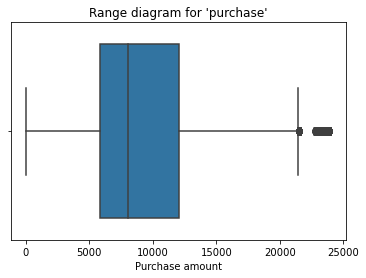

In [16]:
plt.title("Range diagram for 'purchase'")  
ax=sns.boxplot(x = df['purchase'])
ax.set(xlabel='Purchase amount')  
plt.show()

In [17]:
q1 = df['purchase'].quantile(0.25)
q3 = df['purchase'].quantile(0.75)
iqr = q3-q1

upper = q3+1.5*iqr

print(upper)

21400.5


In [18]:
len(df[df['purchase'] > 21400.5])

2677

In [19]:
print(round(len(df[df['purchase'] > 21400.5])/len(df['purchase'])*100,2), '%')

0.49 %


Purchase amount > 21400.5  it's 0.49 % of data. We can delete it without consequences.

In [20]:
df1 = df.query('purchase <= 21400.5')

In [21]:
df = df1.copy()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     547391 non-null  int64 
 1   product_id                  547391 non-null  object
 2   gender                      547391 non-null  object
 3   age                         547391 non-null  object
 4   occupation                  547391 non-null  int16 
 5   city_category               547391 non-null  object
 6   stay_in_current_city_years  547391 non-null  int16 
 7   marital_status              547391 non-null  int16 
 8   product_category_1          547391 non-null  int16 
 9   product_category_2          547391 non-null  int16 
 10  product_category_3          547391 non-null  int16 
 11  purchase                    547391 non-null  int64 
dtypes: int16(6), int64(2), object(4)
memory usage: 35.5+ MB


<a id='converting'></a>
### Converting categorical data into integer

In [23]:
df2 = df.copy() # we will not change the initial dataset 
df2 = pd.get_dummies (df, columns=['gender', 'age', 'city_category', 'stay_in_current_city_years'], drop_first= False)

In [24]:
df2.head()

,user_id,product_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase,gender_F,gender_M,...,age_51-55,age_55+,city_category_A,city_category_B,city_category_C,stay_in_current_city_years_0,stay_in_current_city_years_1,stay_in_current_city_years_2,stay_in_current_city_years_3,stay_in_current_city_years_4
0,1000001,P00069042,10,0,3,0,0,8370,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6,14,15200,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,0,0,1422,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14,0,1057,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,0,0,7969,0,1,...,0,1,0,0,1,0,0,0,0,1


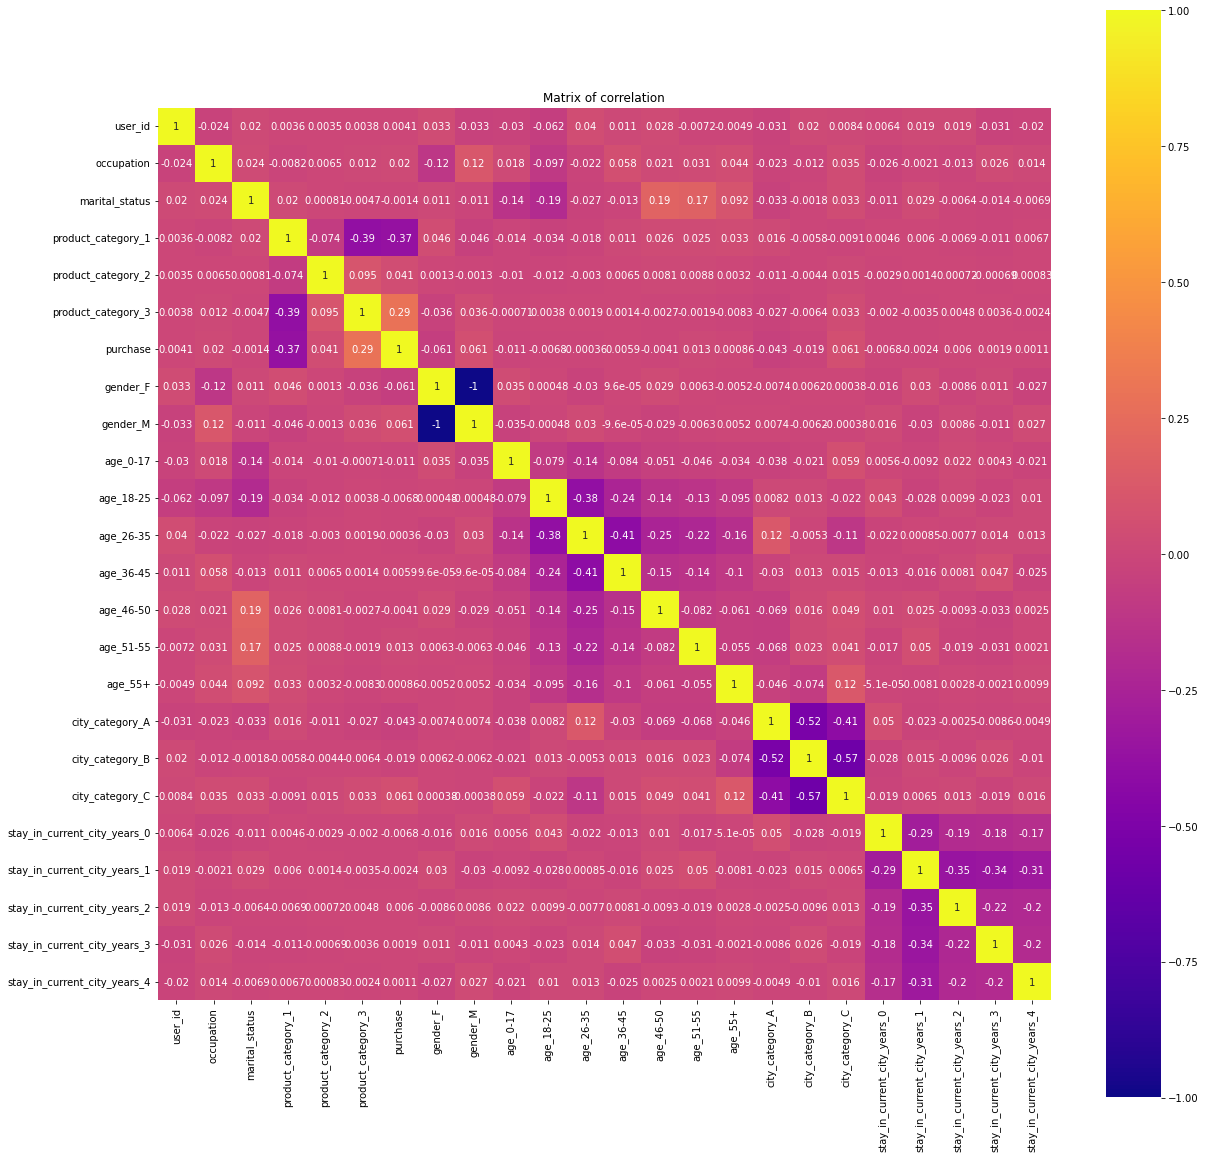

In [25]:
cm = df2.corr() 
fig, ax = plt.subplots(figsize = (20, 20))


sns.heatmap(cm, annot = True, square=True, cmap="plasma")

plt.title('Matrix of correlation')
plt.show()

__There are correlation with city category C, age 51-55, occupation, marital_status. But I think we need doing one-hot coding for occupation and all product category beacouse they are unordered categorical values__

In [26]:
df2[['gender', 'age', 'city_category', 'stay_in_current_city_years']]= \
df[['gender', 'age', 'city_category', 'stay_in_current_city_years']]

<a id='analyse'></a>
## Exploratory data analysis

<a id='purchase'></a>
### Purchase Distribution


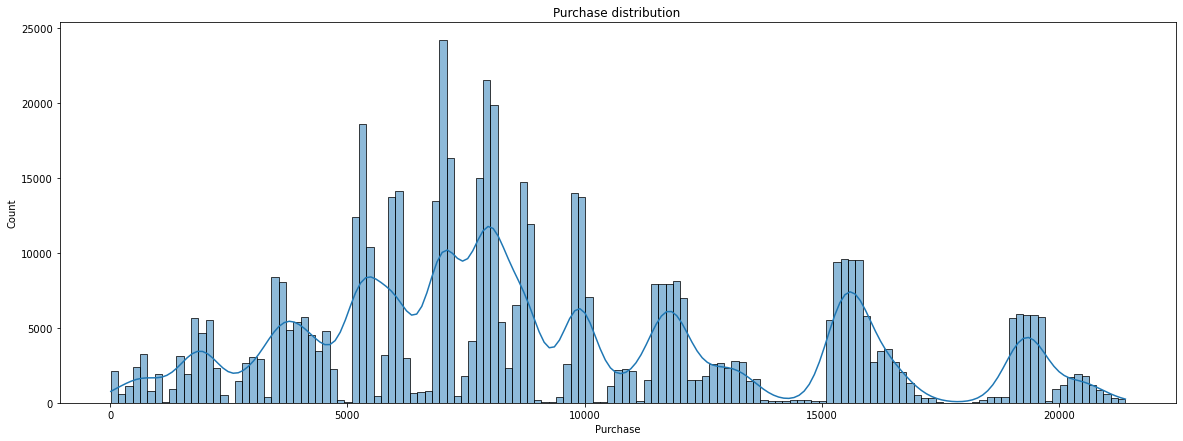

In [27]:
plt.figure(figsize = (20,7))
sns.histplot(x='purchase', data=df, kde=True)
plt.title('Purchase distribution ')
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.show()

__Most of the purchases are between 5k and 10k__

In [28]:
def chart(col):
    
    sns.set_palette("ch:.25")
    plt.figure(figsize = (25,7))
    
    plt.subplot(1,2,1)
    plt.pie(df[col].value_counts(), labels = df[col].value_counts().index, autopct="%.0f%%")
    plt.title("Distribution of the number of purchases by customer {}".format(col), fontsize = 25)
    
    order = df.groupby(col)[['purchase']].mean().sort_values(by='purchase', ascending=False).index
    plt.subplot(1,2,2)
    ax = sns.barplot(x=df[col], y=df['purchase'], order = order)
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title("{} vs purchase".format(col), fontsize = 25)

<a id='age_purchased'></a>
### Age vs Purchased

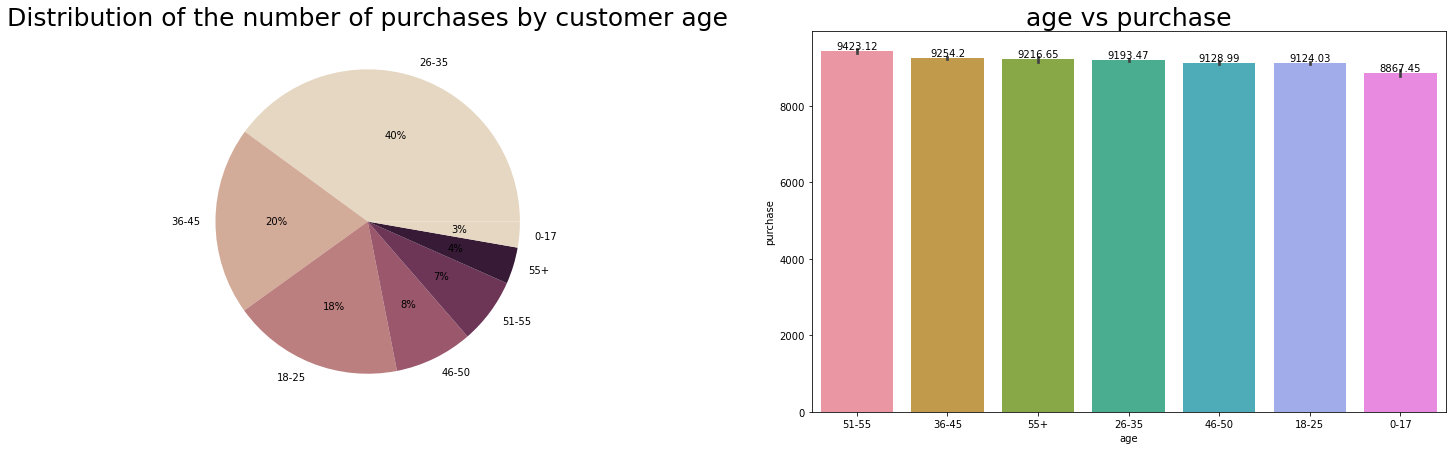

In [29]:
chart('age')

- __Most purchases are made by people 26-35 year old(%40)__
- __51-55 year old customers spent money the most__ 
- __Customers aged 36-45 year old are in second place by their number of purchases and by the average purchase amount__ 

<a id='gender_purchased'></a>
### Gender vs Purchased

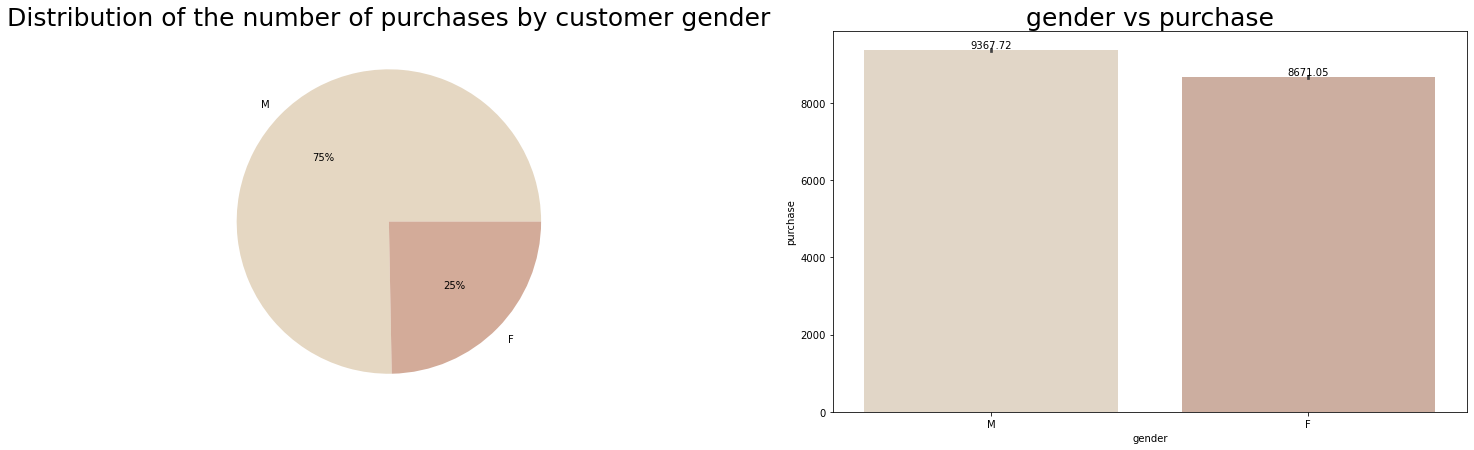

In [30]:
chart('gender')

__75% of customers are male and 25% are female. On average, men spend more than women__

<a id='occupation_purchased'></a>
### Occupation vs Purchased

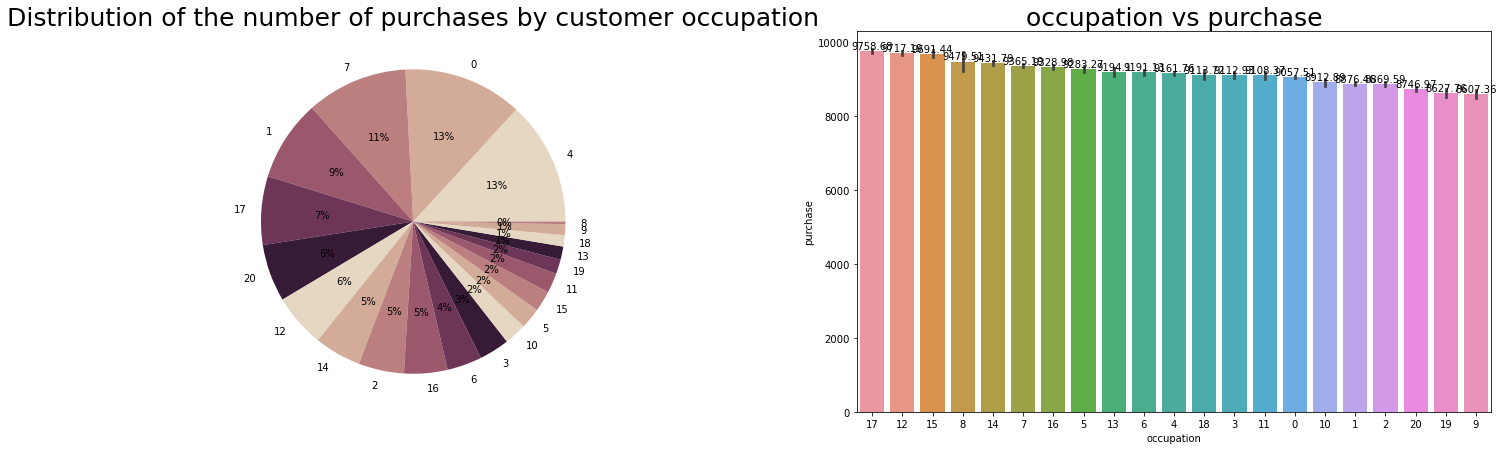

In [31]:
chart('occupation')

__The first three places by the number of purchases have occupations 4, 0, 7. Top 3 spender is 17, 12, 15. Мinimum amount of money spends number 9__

<a id='city_purchased'></a>
### City category vs Purchased

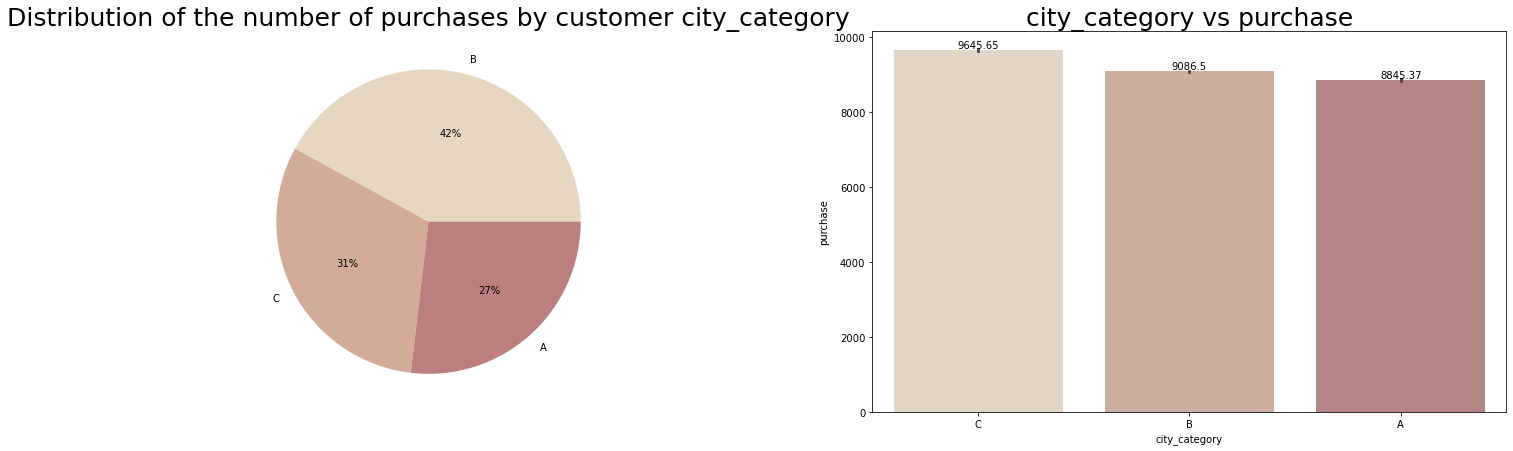

In [32]:
chart('city_category')

__Most customers from the city B (42%). Customers from city C spend the most money. Customers from city A are less numerous and spend the least money__

<a id='stay_in_city_purchased'></a>
### 'Stay in current city years'  vs Purchased

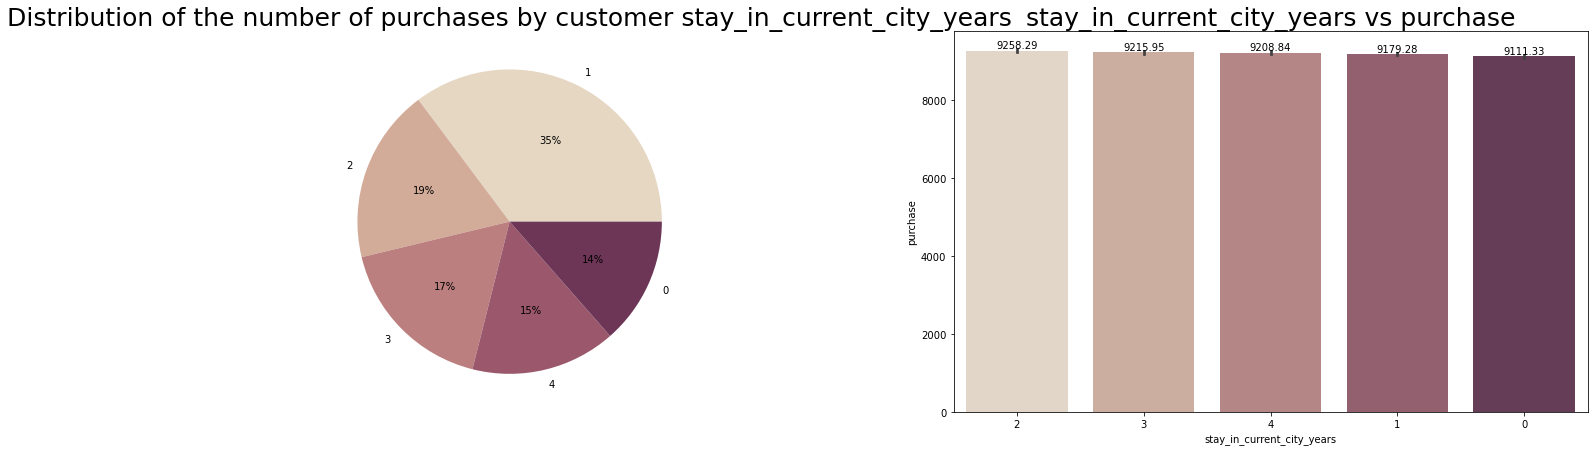

In [33]:
chart('stay_in_current_city_years')

__The largest share of customers (35%) stay in the current city 1 year, 19% - 2 year. Minimum share of customers (14%) stay in the current city less of one years. The average purchase amount is highest for those who stayed in the city for 2 years__  

<a id='marital_status'></a>
### Marital status vs Purchased

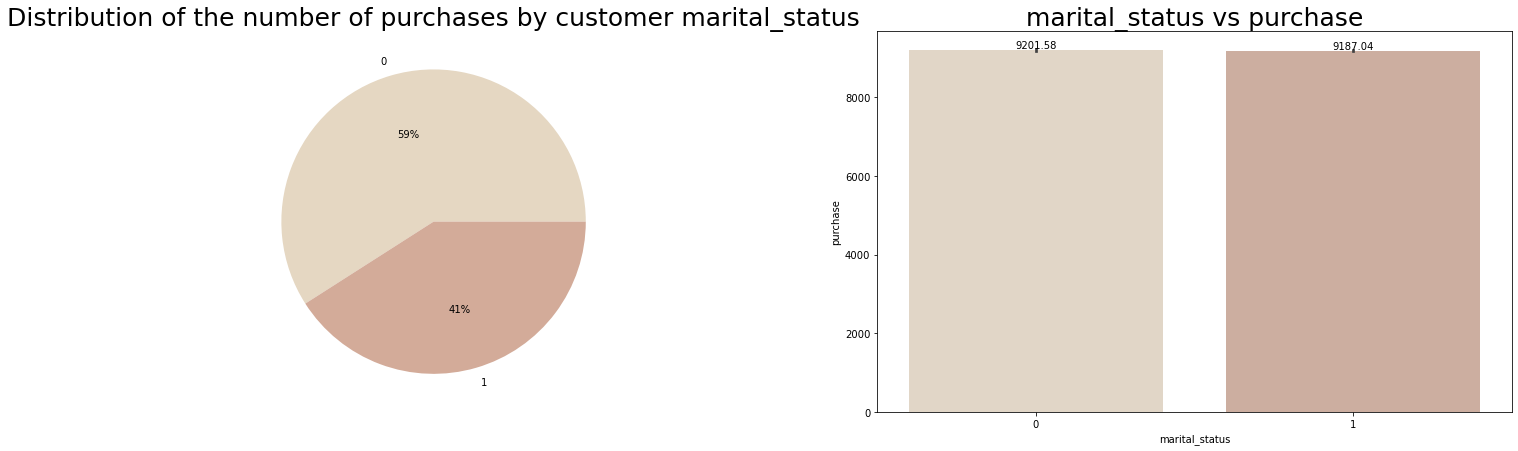

In [34]:
chart('marital_status')

__59% of purchases are made by single people and 41% by married. The average cost of purchases for married and single people does not differ significantly but single spend more__

<a id='product'></a>
### Product categories  vs Purchased

__product category 1__

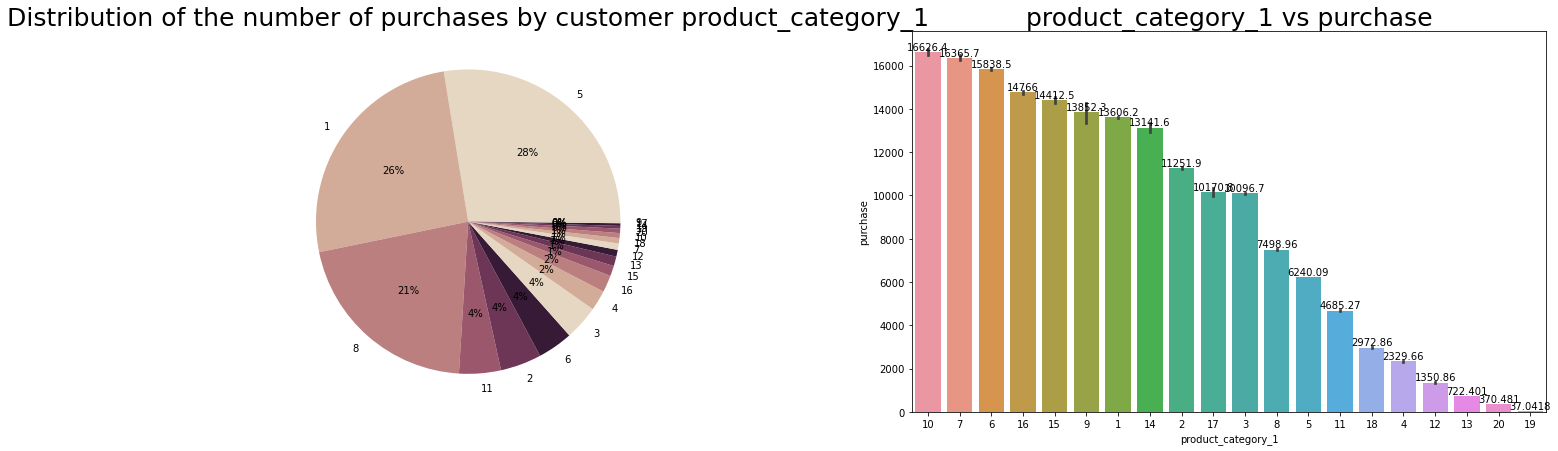

In [35]:
chart('product_category_1')

__Top 3 most popular product categories  from product category 1 are 5 (28%), 1(26%) and 8(21%). But top 3 most expensiv categories are 10, 7 and 6__

__product category 2__

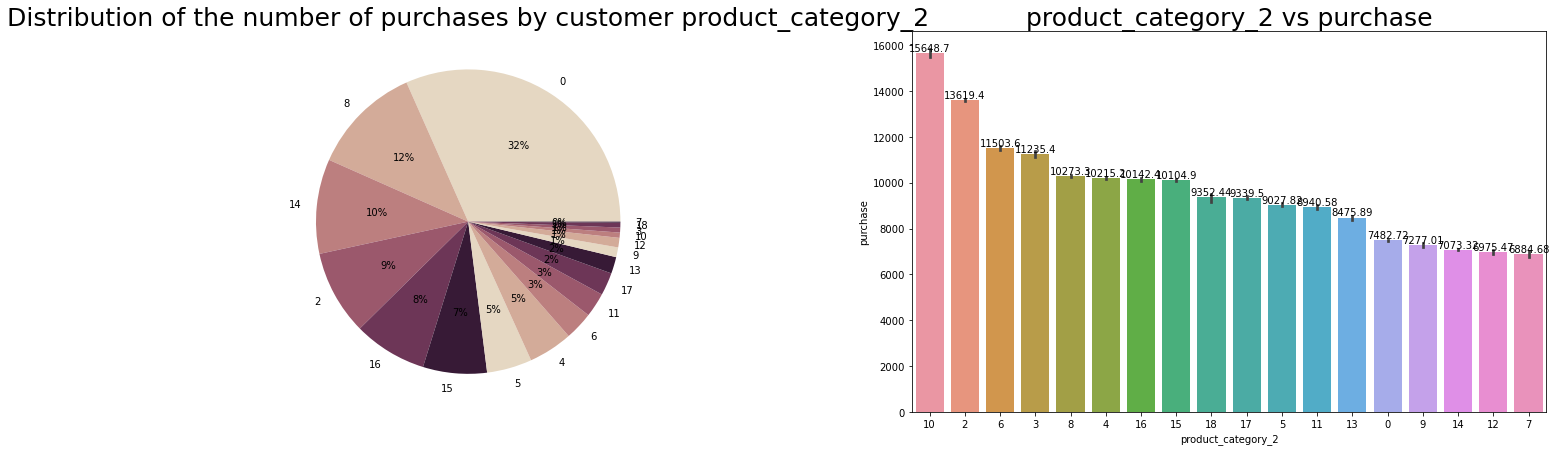

In [36]:
chart('product_category_2')

__32% of products are not in product category 2. Top 3 most popular product categories  from product category 2 are 8 (12%), 14(10%) and 2(9%). But top 3 most expensiv categories are 10, 2 and 6__

__product category 3__

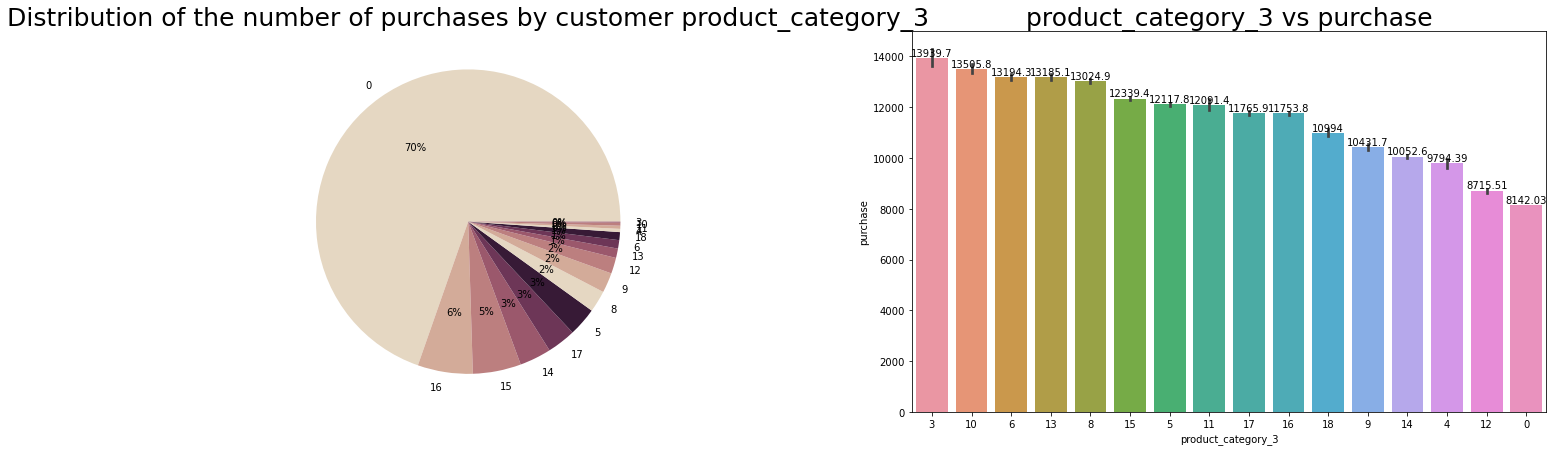

In [37]:
chart('product_category_3')

__70% of products are not in product category 3. Top 3 most popular product categories  from product category 3 are 16 (6%), 15(5%) and 14(3%). But top 3 most expensiv categories are 3, 10 and 6__

<a id='other'></a>
### Other distributions

In [38]:
df_age_gender = df.groupby(['age', 'gender'])[['purchase']].mean().reset_index()


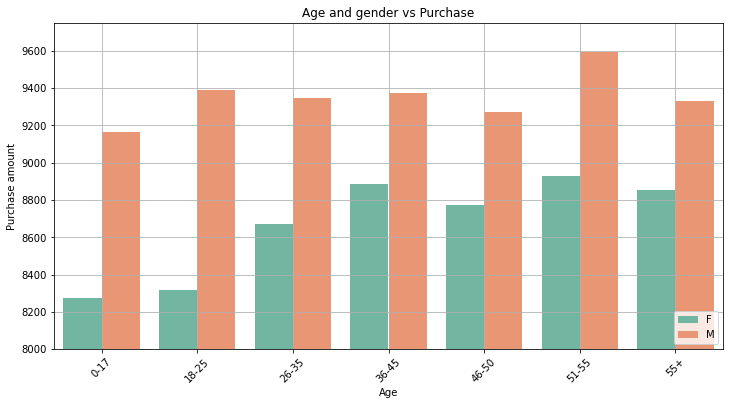

In [39]:
sns.set_palette('Set2')
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='purchase', data=df_age_gender, hue='gender')
plt.title('Age and gender vs Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase amount')
plt.ylim (8000, 9750)
plt.xticks(rotation=45)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

In [40]:
df_age_status = df.groupby(['age', 'marital_status'])[['purchase']].mean()\
.reset_index()
df_age_status.marital_status = df_age_status.marital_status.replace(0, 'single')
df_age_status.marital_status = df_age_status.marital_status.replace(1, 'married')


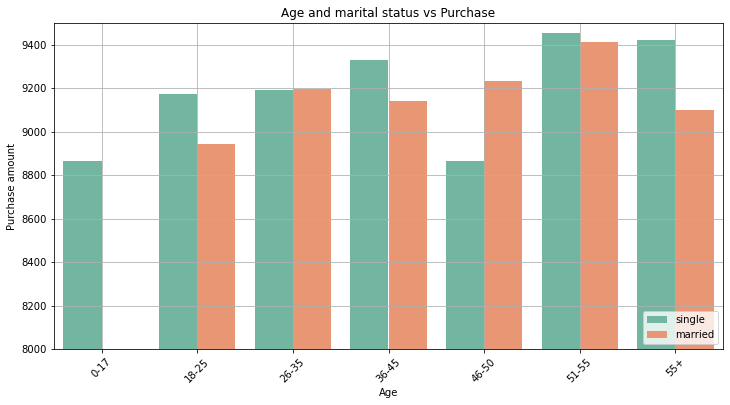

In [41]:
sns.set_palette('Set2')
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='purchase', data=df_age_status, hue='marital_status')
plt.title('Age and marital status vs Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase amount')
plt.ylim (8000, 9500)
plt.xticks(rotation=45)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

In [42]:
df_product = df.groupby('product_id')[['product_id']].count().rename(columns={'product_id': 'count'}).\
sort_values(by='count', ascending=False).reset_index().head(10)


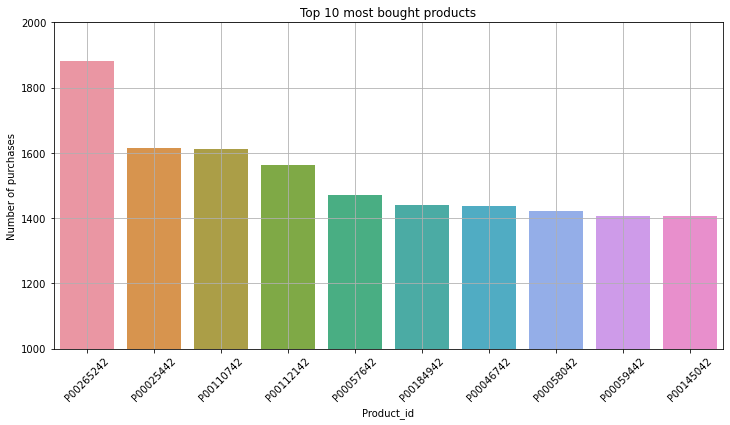

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='count', data=df_product)
plt.title('Top 10 most bought products')
plt.xlabel('Product_id')
plt.ylabel('Number of purchases')
plt.ylim (1000, 2000)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [44]:
occupation=df.groupby(['occupation'])[['purchase']].mean().rename(columns={'purchase': 'mean'})\
.sort_values(by='mean', ascending=False).reset_index().head(5)

In [45]:
list_ocupation = occupation['occupation'].rename('5')
df_occupation = df.loc[df['occupation'].isin(list_ocupation)].reset_index()

In [46]:
df_occupation_status = df_occupation.groupby(['occupation','marital_status'])[['purchase']].mean()\
.rename(columns={'purchase': 'mean'}).sort_values(by='mean', ascending=False).reset_index()

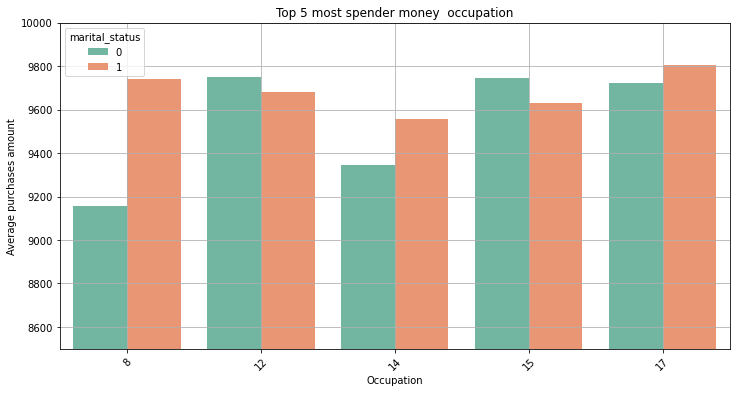

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='mean', hue='marital_status', data=df_occupation_status)
plt.title('Top 5 most spender money  occupation')
plt.xlabel('Occupation')
plt.ylabel('Average purchases amount')
plt.ylim (8500, 10000)
plt.xticks(rotation=45)
plt.grid()
plt.show()

__Between customers with occupation 8, 14 and 17 singles spend more then married. With occupation 12 and 15 on the contrary__

In [48]:
df_occupation_gender = df_occupation.groupby(['occupation','gender'])[['purchase']].mean().rename(columns={'purchase': 'mean'})\
.sort_values(by='mean', ascending=False).reset_index()

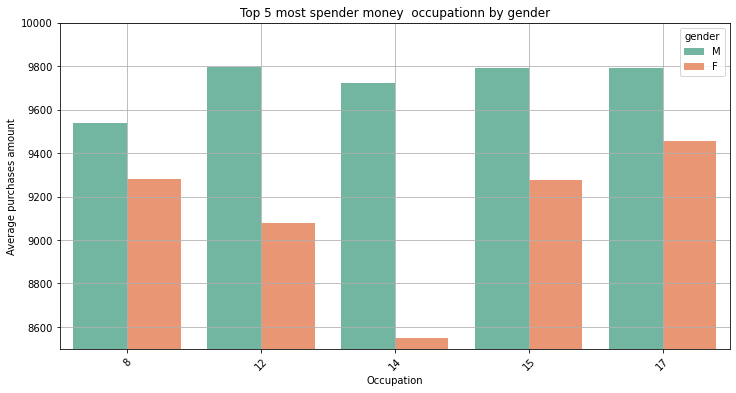

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='mean', hue='gender', data=df_occupation_gender)
plt.title('Top 5 most spender money  occupationn by gender')
plt.xlabel('Occupation')
plt.ylabel('Average purchases amount')
plt.ylim (8500, 10000)
plt.xticks(rotation=45)
plt.grid()
plt.show()

__For occupation 15 women spend much less than men. For other top5 occupations the difference is not so big__  

In [50]:
df_occupation_pc1 = df_occupation.groupby(['product_category_1', 'occupation'])[['purchase']].mean()\
.rename(columns={'purchase': 'mean'}).reset_index()

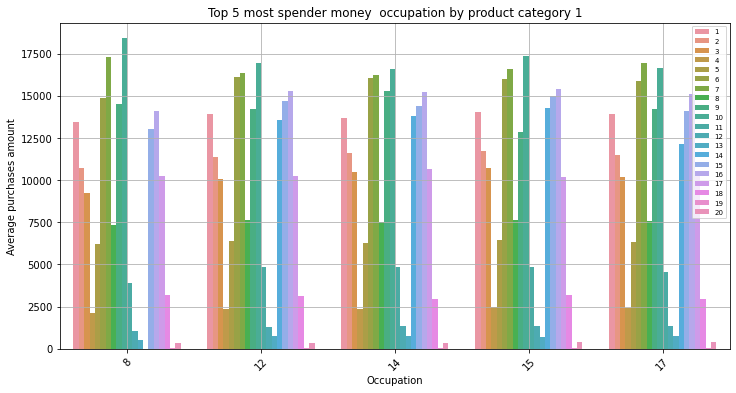

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='mean', hue='product_category_1', data=df_occupation_pc1)
plt.title('Top 5 most spender money  occupation by product category 1')
plt.xlabel('Occupation')
plt.ylabel('Average purchases amount')
plt.xticks(rotation=45)
plt.legend(loc='best', fontsize=7)
plt.grid()
plt.show()

__Between top 5 most spender occupations the most 3 popular category from product category1 are 7,8,10__

<a id='conclusions'></a>
### Conclusions and recommendations

- Most of the purchases are between 5k and 10k

- Most purchases are made by people 26-35 year old(%40)
- 51-55 year old customers spent money the most
- Customers aged 36-45 year old are in second place by their number of purchases and by the average purchase amount

- 75% of customers are male and 25% are female. On average, men spend more than women

- The first three places by the number of purchases have occupations 4, 0, 7. Top 3 spender is 17, 12, 15. Мinimum amount of money spends number 9

- Between customers with occupation 8, 14 and 17 singles spend more then married. With occupation 12 and 15 on the contrary


- Most customers from the city B (42%). Customers from city C spend the most money. Customers from city A are less numerous and spend the least money

- The largest share of customers (35%) stay in the current city 1 year, 19% - 2 year. Minimum share of customers (14%) stay in the current city less of one years. The average purchase amount is highest for those who stayed in the city for 2 years

- 59% of purchases are made by single people and 41% by married. The average cost of purchases for married and single people does not differ significantly but single spend more

- Top 3 most popular product categories from product category 1 are 5 (28%), 1(26%) and 8(21%). But top 3 most expensiv categories are 10, 7 and 6

- Between top 5 most spender occupations the most 3 popular category from product category1 are 7,8,10

- 32% of products are not in product category 2. Top 3 most popular product categories from product category 2 are 8 (12%), 14(10%) and 2(9%). But top 3 most expensiv categories are 10, 2 and 6

- 70% of products are not in product category 3. Top 3 most popular product categories from product category 3 are 16 (6%), 15(5%) and 14(3%). But top 3 most expensiv categories are 3, 10 and 6
